<a href="https://colab.research.google.com/github/aswego123/COVID19-India-MP2/blob/main/Covid19_worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS AND DEEP LEARNING ON WORLDWIDE COVID19 DATASET

### TABLE OF CONTENT



## Data Analysis

In [ ]:
# Load libraries
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
# import us

In [ ]:
# Color, theme, color palettes
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [ ]:
# Uploading dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Full data
full_table = pd.read_csv('/content/drive/MyDrive/covid/worldwide/covid_19_clean_complete.csv')
full_table.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
# Grouped by day, country
full_grouped = pd.read_csv('/content/drive/MyDrive/covid/worldwide/full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
# full_grouped.head()

In [ ]:
# Day wise
day_wise = pd.read_csv('/content/drive/MyDrive/covid/worldwide/day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
# day_wise.head()

In [ ]:
# Country wise
country_wise = pd.read_csv('/content/drive/MyDrive/covid/worldwide/country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
# country_wise.head()

In [ ]:
# Worldometer data
worldometer_data = pd.read_csv('/content/drive/MyDrive/covid/worldwide/worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)
# worldometer_data.head()

Visualisation

In [ ]:
import plotly.express as px
temp = day_wise[['Date','Deaths', 'Recovered', 'Active']].tail(1)
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(temp, path=["variable"], values="value", height=225, 
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
# MAPS
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [ ]:
plot_map(country_wise, 'Confirmed', 'matter')

In [ ]:
plot_map(full_grouped, 'Deaths', 'matter')

In [ ]:
plot_map(country_wise, 'Deaths / 100 Cases', 'matter')

In [ ]:
# Cases Over the time
fig = px.choropleth(full_grouped, locations="Country/Region", 
                    color=np.log(full_grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



In [ ]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
temp = full_grouped.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

<ipython-input-20-4d79c75455fb>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
plot_daywise('Confirmed', '#333333')

In [ ]:
plot_daywise('Active', '#333333')

In [ ]:
plot_daywise('New cases', '#333333')

In [ ]:
plot_daywise('Deaths', dth)

In [ ]:
plot_daywise('Recovered', rec)

In [ ]:
plot_daywise('New recovered', rec)

In [ ]:
plot_daywise_line('Deaths / 100 Cases', dth)

In [ ]:
plot_daywise_line('Deaths / 100 Recovered', dth)

In [ ]:
plot_daywise_line('Recovered / 100 Cases', rec)

In [ ]:
plot_daywise('No. of countries', '#035aa6')

In [ ]:
temp = day_wise[['Date', 'Recovered', 'Active']]
temp = temp.melt(id_vars='Date', value_vars=['Recovered', 'Active'], 
                 var_name='Variable', value_name='Count')
px.line(temp, x='Date', y='Count', color='Variable')

Top 20 Countries

In [ ]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
def plot_hbar_wm(col, n, min_pop=1000000, sort='descending'):
    df = worldometer_data[worldometer_data['Population']>min_pop]
    df = df.sort_values(col, ascending=True).tail(n)
    fig = px.bar(df,
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, 
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' (Only countries with > 1M Pop)', 
                      xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
plot_hbar(country_wise, 'Confirmed', 15)

In [ ]:
plot_hbar(country_wise, 'Active', 15)

In [ ]:
plot_hbar(country_wise, 'New cases', 15)

In [ ]:
plot_hbar(country_wise, 'Deaths', 15)

In [ ]:
plot_hbar(country_wise, 'Recovered', 15)

In [ ]:
plot_hbar_wm('Tot Cases/1M pop', 15, 1000000)

In [ ]:
plot_hbar_wm('TotalTests', 15, 1000000)

Date vs cases analysis

In [ ]:
def plot_stacked(col):
    fig = px.bar(full_grouped, x="Date", y=col, color='Country/Region', 
                 height=600, title=col, 
                 color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [ ]:
def plot_line(col):
    fig = px.line(full_grouped, x="Date", y=col, color='Country/Region', 
                  height=600, title=col, 
                  color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [ ]:
plot_stacked('Confirmed')

In [ ]:
plot_stacked('Deaths')

In [ ]:
plot_stacked('New cases')

In [ ]:
plot_stacked('Active')

In [ ]:
plot_line('Confirmed')

In [ ]:
plot_line('Deaths')

## Exploratory Data Analysis (EDA) and Predictions

In [ ]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm


from pathlib import Path
data_dir = Path('../input/covid19-global-forecasting-week-1')

import os
os.listdir(data_dir)

import warnings
warnings.filterwarnings('ignore')

## ARIMA CODE3
This code first loads the COVID 19 data set, filters for positive cases only, and plots the number of positive cases over time. It then performs stationarity tests (ADF and KPSS) and plots the autocorrelation and partial autocorrelation graphs. An ARIMA model is fit to the data, and a 30 day forecast is generated. The forecasted values are plotted along with the actual values and the mean squared error is calculated.

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/covid/worldwide/Covidworldwide_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

Date             WHO Region      Country/Region  Confirmed  Deaths  \
0      22/01/20  Eastern Mediterranean         Afghanistan          0       0   
1      22/01/20                 Europe             Albania          0       0   
2      22/01/20                 Africa             Algeria          0       0   
3      22/01/20                 Europe             Andorra          0       0   
4      22/01/20                 Africa              Angola          0       0   
...         ...                    ...                 ...        ...     ...   
35151  27/07/20  Eastern Mediterranean  West Bank and Gaza      10621      78   
35152  27/07/20                 Africa      Western Sahara         10       1   
35153  27/07/20  Eastern Mediterranean               Yemen       1691     483   
35154  27/07/20                 Africa              Zambia       4552     140   
35155  27/07/20                 Africa            Zimbabwe       2704      36   

       Recovered  Active  New cases  New deaths  New recovered  
0              0       0          0           0              0  
1              0       0          0           0              0  
2              0       0          0           0              0  
3              0       0          0           0              0  
4              0       0          0           0              0  
...          ...     ...        ...         ...            ...  
35151       3752    6791        152           2              0  
35152          8       1          0           0              0  
35153        833     375         10           4             36  
35154       2815    1597         71           1            465  
35155        542    2126        192           2             24  

[35156 rows x 10 columns]

In [ ]:
# Filter for active cases only
positive_data = data[data["Active"] >= 1].groupby("Date").sum()
positive_data = positive_data.reset_index()

In [ ]:
# Get the values of the "Total_test" column
X = positive_data["Confirmed"].values

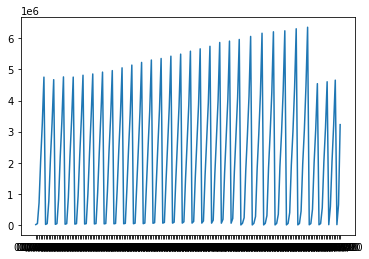

In [ ]:
# Plot the number of positive cases over time
plt.plot(positive_data['Date'], positive_data['Active'])
plt.show()

In [ ]:
# Make the data stationary using differencing
X = np.diff(X)

In [ ]:
# Split the data into training and test sets
train_data = X[:len(X) - 30]
test_data = X[len(X) - 30:]

This code splits the data into two parts: train_data and test_data. The train_data is created by taking the first len(X) - 30 samples of the original data X. The test_data is created by taking the last 30 samples of X.

In [ ]:
train_data

array([    75628,    859902,   2408343,   2924283,   4386008, -10649415,
           72858,    939323,   2408629,   2963424,   4472968, -10854102,
           72335,   1019901,   2403100,   3005186,   4557093, -11053604,
           70623,   1098065,   2398706,   3056041,   4623751, -11243441,
           69669,   1166992,   2406959,   3106951,   4675680, -11423092,
           70453,   1235721,   2424227,   3152941,   4707093, -11586903,
           70975,   1308540,   2436440,   3174610,   4807182, -11795014,
           72197,   1388349,   2444193,   3185201,   4916876, -12003789,
           73070,   1471074,   2443414,   3223678,   5021478, -12230176,
           75556,   1553708,   2432002,   3281496,   5119136, -12459856,
           81178,   1623009,   2430940,   3343707,   5197350, -12674303,
           85044,   1714043,   2417758,   3389202,   5260953, -12853355,
           85803,   1769233,   2432898,   3440469,   5318586, -13040505,
           90425,   1828054,   2460076,   3477226, 

In [ ]:
test_data

array([  2632305,   4179875,   6474598, -16247963,     79082,    521057,
         2429750,   2666201,   4255396,   6525179, -16474014,     77807,
          587337,   2437393,   2710216,   4297712, -10109877,     79114,
          645019,   2454885,   2754314,   4335117, -10266381,    786704,
         2473927,   2808582,   4371066, -10438586,    861427,   5313645])

In [ ]:
# Check for stationarity using the ADF- Augmented Dickey-Fuller test
adf_result = ts.adfuller(train_data)
print("ADF test statistic: ", adf_result[0])
print("p-value: ", adf_result[1])
print("Critical Values: ", adf_result[4])

ADF test statistic:  -5.9602458704191985
p-value:  2.0471739247086827e-07
Critical Values:  {'1%': -3.476273058920005, '5%': -2.881687616548444, '10%': -2.5775132580261593}


A p-value close to 0 in the ADF test indicates that the data is stationary, as it suggests that the null hypothesis of non-stationarity can be rejected. In this case, the p-value of 2.86e-12 is very small, so it can be concluded that the data is indeed stationary.

In [ ]:
# Check for stationarity using the KPSS test
kpss_result = ts.kpss(train_data)
print("KPSS test statistic: ", kpss_result[0])
print("p-value: ", kpss_result[1])
print("Critical Values: ", kpss_result[3])

KPSS test statistic:  0.0483668112810744
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


For the KPSS test, the ideal result would be a low p-value (less than the significance level, typically 0.05) and a test statistic below the critical values. This indicates that the null hypothesis (that the data is stationary) cannot be rejected, meaning the data is stationary.

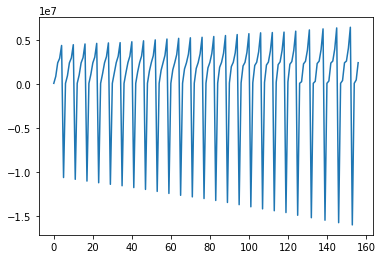

In [ ]:
plt.plot(train_data) # stationary 

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


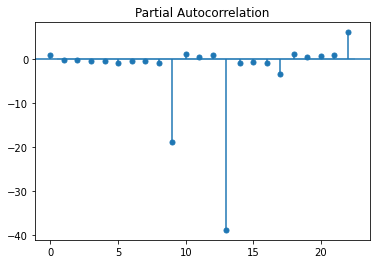

In [ ]:
# Plot the partial autocorrelation graph
plot_pacf(train_data)
plt.show()

*Value of p= 2*

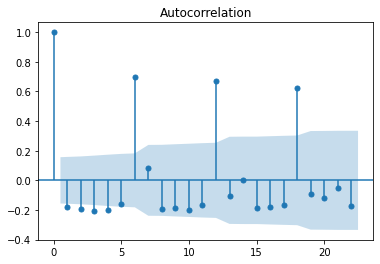

In [ ]:
# Plot the autocorrelation graph
plot_acf(train_data)
plt.show()

*Value of q=2*

In [ ]:
# checking the values of p, d, q
def arima_model_comparison(data, p_values, d_values, q_values):
    best_model = None
    best_rmse = float('inf')

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()

                    # Split the data into training and testing sets
                    train_data = data[:-12]
                    test_data = data[-12:]

                    # Make predictions on the test set
                    predict = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

                    # Calculate the RMSE
                    rmse = np.sqrt(mean_squared_error(test_data, predict))

                    # Keep track of the best model based on RMSE
                    if rmse < best_rmse:
                        best_model = model_fit
                        best_rmse = rmse
                except:
                    continue

    return best_model, best_rmse

# Example usage:
data = X
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

best_model, best_rmse = arima_model_comparison(data, p_values, d_values, q_values)
print("Best Model: ", best_model.summary())
print("Best RMSE: ", best_rmse)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespa

Best Model:                                 SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  187
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3138.526
Date:                Fri, 24 Feb 2023   AIC                           6283.052
Time:                        05:56:52   BIC                           6292.730
Sample:                             0   HQIC                          6286.974
                                - 187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9826      0.155    -12.778      0.000      -2.287      -1.679
ma.L2          0.9867      0.155      6.354      0.000       0.682       1.291
sigma2      3.572e+13   3.47e-15   1.03

In [ ]:
# Fit an ARIMA model to the data
model = ARIMA(train_data, order=(2,1,4))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2626.992
Date:                Fri, 24 Feb 2023   AIC                           5267.985
Time:                        05:59:19   BIC                           5289.334
Sample:                             0   HQIC                          5276.656
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9495      0.166     -5.731      0.000      -1.274      -0.625
ar.L2         -0.7492      0.194     -3.860      0.000      -1.130      -0.369
ma.L1         -0.6155      0.243     -2.536      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

[ 1.64422581e+06 -6.96686036e+05  6.08274960e+05 -1.68097090e+05
 -4.08630609e+05  4.01454307e+05 -1.87535484e+05 -2.35214794e+05
  2.51353270e+05 -1.74938778e+05 -1.34714157e+05  1.46486052e+05
 -1.50662373e+05 -7.91948328e+04  7.55794423e+04 -1.24931089e+05
 -5.05016205e+04  2.90552141e+04 -1.02252628e+05 -3.71778889e+04
 -5.87797116e+02 -8.40881084e+04 -3.22160765e+04 -1.89088150e+04
 -7.04091779e+04 -3.14779136e+04 -2.98585312e+04 -6.05650578e+04
 -3.26213230e+04 -3.61484279e+04]


In [ ]:
# Make predictions using the ARIMA model
predict=model_fit.predict(typ='levels')
predict[:30]

array([       0.        ,    40946.747648  ,   257849.77885551,
         139570.99406673,   207837.13342972,   -88815.27556868,
        3098009.36238751,  5412593.43768045,  3189538.61318696,
       -1007861.53675086,   895499.23782681, -3177006.98829329,
        1440392.90502617,  6580259.98939211,  2475037.40865337,
       -1108447.85617366,  1683931.24377951, -5309420.57378114,
        1555374.20048208,  6800609.81874831,  1561134.60064897,
        -269484.87013364,  1325225.99405264, -6432486.92593052,
        2098313.41440636,  6133654.7867941 ,  1536496.18512936,
         185730.55421113,   480706.37862371, -6507400.45480983])

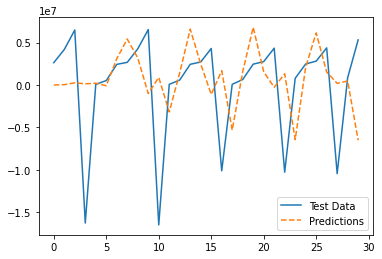

In [ ]:
# old plot
# Plot the predictions along with the test data
#plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predict, '--', label='Predictions')
plt.legend()
plt.show()

In [ ]:
# evaluate forecasts
predict_len = len(test_data)
predict = predict[:predict_len]
rmse = sqrt(mean_squared_error(test_data, predict)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6894270.015


## GMM ML MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/covid/worldwide/Covidworldwide_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

Date             WHO Region      Country/Region  Confirmed  Deaths  \
0      22/01/20  Eastern Mediterranean         Afghanistan          0       0   
1      22/01/20                 Europe             Albania          0       0   
2      22/01/20                 Africa             Algeria          0       0   
3      22/01/20                 Europe             Andorra          0       0   
4      22/01/20                 Africa              Angola          0       0   
...         ...                    ...                 ...        ...     ...   
35151  27/07/20  Eastern Mediterranean  West Bank and Gaza      10621      78   
35152  27/07/20                 Africa      Western Sahara         10       1   
35153  27/07/20  Eastern Mediterranean               Yemen       1691     483   
35154  27/07/20                 Africa              Zambia       4552     140   
35155  27/07/20                 Africa            Zimbabwe       2704      36   

       Recovered  Active  New cases  New deaths  New recovered  
0              0       0          0           0              0  
1              0       0          0           0              0  
2              0       0          0           0              0  
3              0       0          0           0              0  
4              0       0          0           0              0  
...          ...     ...        ...         ...            ...  
35151       3752    6791        152           2              0  
35152          8       1          0           0              0  
35153        833     375         10           4             36  
35154       2815    1597         71           1            465  
35155        542    2126        192           2             24  

[35156 rows x 10 columns]

In [ ]:
# Select the columns to transform
cols_to_transform = ["Recovered", "Deaths", "Confirmed", "Active"]

# Apply log transformations
data[cols_to_transform] = data[cols_to_transform].apply(np.log)

Estimated mean: 927.1932550136511
Estimated covariance: 315273.0831106658


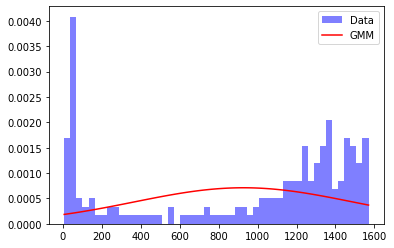

In [ ]:
# Extract the total number of cases for a single state
# X = data["Total_test"].values.reshape(-1,1)
state_data = data[data["Active"] >= 1].groupby("Date").sum()
X = state_data["Confirmed"].values.reshape(-1,1)
# Train the GMM with a single component
gmm = GaussianMixture(n_components=1)
gmm.fit(X)
# Get the estimated mean and covariance of the Gaussian distribution
mean = gmm.means_[0][0]
cov = gmm.covariances_[0][0][0]
print("Estimated mean:", mean)
print("Estimated covariance:", cov)
# Plot the histogram of the data and the estimated Gaussian distribution
plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Data')
x = np.linspace(X.min(), X.max(), 100)
y = 1/np.sqrt(2*np.pi*cov)*np.exp(-(x-mean)**2/(2*cov))
plt.plot(x, y, color='red', label='GMM')
plt.legend()
plt.show()

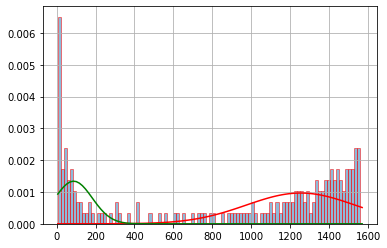

In [ ]:
# Extract the total number of cases for a single state
state_data = data[data["Recovered"] >= 1].groupby("Date").sum()
X = state_data["Confirmed"].values.reshape(-1,1)
g = GaussianMixture(n_components=2,covariance_type='full')
g.fit(X)
weights = g.weights_
means = g.means_
covars = g.covariances_
x_axis = x
x_axis.sort()
plt.hist(X, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(x_axis,weights[0]*stats.norm.pdf(x_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(x_axis,weights[1]*stats.norm.pdf(x_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
# first plotting the histogram and adding gaussian plots on them
# mean, variance and adding weight on it generates a gaussian plot (height)
plt.grid()
plt.show()

This code is training and plotting a Gaussian Mixture Model (GMM) with 2 components on the total number of positive COVID-19 cases in a particular state over time. The data is loaded into a pandas dataframe from a csv file "/content/drive/MyDrive/covid/JanApril20.csv". The positive cases data is grouped by date and the total number of tests on those dates is extracted. The Gaussian Mixture Model is trained on this data, X.

The first plot shows the histogram of the data and the estimated Gaussian distribution. The GMM model is trained with a single component and the mean and covariance of the Gaussian distribution are estimated. The red curve shows the estimated Gaussian distribution and the blue bars show the histogram of the data.

The second plot shows the histogram of the data and two Gaussian distributions (in red and green) that fit the data. The Gaussian Mixture Model is trained with 2 components, and the mean, covariance, and weight of each component are estimated. The red and green curves are the estimated Gaussian distributions, with their heights proportional to the estimated weights of the corresponding components.

The x-axis represents the total number of tests, and the y-axis represents the probability density function of the estimated Gaussian distributions. The graph shows how the data is fitted with two Gaussian distributions and how the model is able to capture the underlying structure of the data.

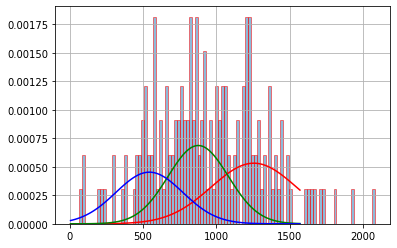

In [ ]:
# Extract the total number of cases for a single state
failed_data = data[data["Deaths"] >= 1].groupby("Country/Region").sum()
Y = failed_data["Confirmed"].values.reshape(-1,1)
# Train the GMM with a single component
g = GaussianMixture(n_components=3,covariance_type='full')
g.fit(Y)
weights = g.weights_
means = g.means_
covars = g.covariances_
x_axis = x
x_axis.sort()
plt.hist(Y, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(x_axis,weights[0]*stats.norm.pdf(x_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(x_axis,weights[1]*stats.norm.pdf(x_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
plt.plot(x_axis,weights[2]*stats.norm.pdf(x_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')
plt.grid()
plt.show()